# Normalising the data

In [1]:
# Import libraries 
import pandas as pd
import numpy as np

In [38]:
# load data into a pandas dataframe
health_and_wellbeing = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\Health_and_wellbeing.csv')
economic_vulnerability = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\Economic_vulnerability.csv')
social_vulnerability = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\Social_vulnerability.csv')

In [39]:
# remove name and code columns from the dataframes 
health_and_wellbeing = health_and_wellbeing.drop(['Code', 'Name'], axis=1)
economic_vulnerability = economic_vulnerability.drop(['Code', 'Name'], axis=1)
social_vulnerability = social_vulnerability.drop(['Code', 'Name'], axis=1)

In [42]:
# normalise each column of the dataframes
health_and_wellbeing_norm = (health_and_wellbeing - health_and_wellbeing.min()) / (health_and_wellbeing.max() - health_and_wellbeing.min())
economic_vulnerability_norm = (economic_vulnerability - economic_vulnerability.min()) / (economic_vulnerability.max() - economic_vulnerability.min())
social_vulnerability_norm = (social_vulnerability - social_vulnerability.min()) / (social_vulnerability.max() - social_vulnerability.min())

In [47]:
# save normalised data as a new csv file
health_and_wellbeing_norm.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\Health_and_wellbeing_norm.csv')
economic_vulnerability_norm.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\economic_vulnerability_norm.csv')
social_vulnerability_norm.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\social_vulnerability_norm.csv')

# Make scree plots for each dimension of vulnerability

To determine how many components should be used in PCA.

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Health and wellbeing 

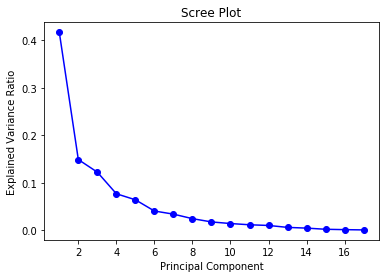

In [49]:
pca = PCA()
pca.fit(health_and_wellbeing_norm)

# get the explained variance ratio of each component
explained_var_ratio = pca.explained_variance_ratio_

# plot the scree plot
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

## Economic vulnerability

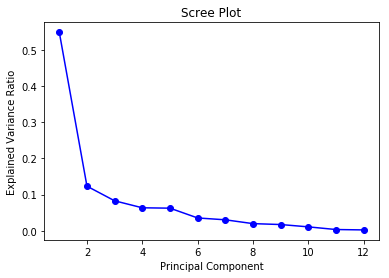

In [50]:
pca = PCA()
pca.fit(economic_vulnerability_norm)

# get the explained variance ratio of each component
explained_var_ratio = pca.explained_variance_ratio_

# plot the scree plot
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

## Social Vulnerability

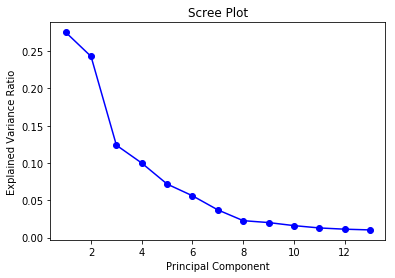

In [51]:
pca = PCA()
pca.fit(social_vulnerability_norm)

# get the explained variance ratio of each component
explained_var_ratio = pca.explained_variance_ratio_

# plot the scree plot
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Perform principal component analysis and L2 norm for each dimension of vulnerability

PCA reduces the number of variables (for each MSOA) while preserving the important features. The final vulnerability score (for each MSOA) is calculated using the L2 norm of each principal component.

## Health and wellbeing

In [65]:
# Create a PCA instance with desired number of components
pca = PCA(n_components=6)

# Fit and transform the data to get the principal components
principal_components = pca.fit_transform(health_and_wellbeing_norm)

# Create a new dataframe with the principal components
health_and_wellbeing_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [66]:
health_and_wellbeing_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.034035,0.073292,0.387675,-0.088372,-0.150457,0.038059
1,0.101565,0.241237,0.227016,-0.155615,-0.140463,-0.039818
2,0.148628,-0.101061,0.379678,0.077415,-0.206129,0.116487
3,0.287338,0.039724,0.265087,-0.088959,-0.079424,-0.125838
4,0.302429,-0.035339,0.284569,0.033253,-0.262964,-0.024192


In [67]:
# Calculate the L2 norm for each row of the principal components
health_and_wellbeing_l2 = np.linalg.norm(principal_components, axis=1)

# Create a new column in the PCA DataFrame with the L2 norms
health_and_wellbeing_pca['L2_norm'] = health_and_wellbeing_l2

# Calculate the final vulnerability score for each row
final_vulnerability_score = np.square(health_and_wellbeing_l2)

# Add the final vulnerability score as a new column in the PCA DataFrame
health_and_wellbeing_pca['final_vulnerability_score'] = final_vulnerability_score

In [68]:
health_and_wellbeing_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,L2_norm,final_vulnerability_score
0,-0.034035,0.073292,0.387675,-0.088372,-0.150457,0.038059,0.434416,0.188717
1,0.101565,0.241237,0.227016,-0.155615,-0.140463,-0.039818,0.406913,0.165578
2,0.148628,-0.101061,0.379678,0.077415,-0.206129,0.116487,0.488375,0.238510
3,0.287338,0.039724,0.265087,-0.088959,-0.079424,-0.125838,0.429499,0.184469
4,0.302429,-0.035339,0.284569,0.033253,-0.262964,-0.024192,0.494503,0.244533


In [69]:
# Save the PCA DataFrame as a CSV file
health_and_wellbeing_pca.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\health_and_wellbeing_pca.csv', index=False)

## Economic vulnerability

In [70]:
# Create a PCA instance with desired number of components
pca = PCA(n_components=6)

# Fit and transform the data to get the principal components
principal_components = pca.fit_transform(economic_vulnerability_norm)

# Create a new dataframe with the principal components
economic_vulnerability_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [71]:
economic_vulnerability_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.927230,0.089001,-0.079160,-0.290427,0.294921,-0.015394
1,0.211018,-0.030726,0.165261,-0.252541,-0.085656,0.048301
2,-0.686895,0.684326,0.161060,0.542548,-0.147030,-0.025157
3,0.362109,-0.234794,0.372927,0.067334,-0.159769,-0.106455
4,-0.827945,-0.148465,0.124249,-0.063003,0.110874,0.026962


In [72]:
# Calculate the L2 norm for each row of the principal components
economic_vulnerability_l2 = np.linalg.norm(principal_components, axis=1)

# Create a new column in the PCA DataFrame with the L2 norms
economic_vulnerability_pca['L2_norm'] = economic_vulnerability_l2

# Calculate the final vulnerability score for each row
final_vulnerability_score = np.square(economic_vulnerability_l2)

# Add the final vulnerability score as a new column in the PCA DataFrame
economic_vulnerability_pca['final_vulnerability_score'] = final_vulnerability_score

In [73]:
economic_vulnerability_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,L2_norm,final_vulnerability_score
0,-0.927230,0.089001,-0.079160,-0.290427,0.294921,-0.015394,1.022500,1.045505
1,0.211018,-0.030726,0.165261,-0.252541,-0.085656,0.048301,0.382401,0.146231
2,-0.686895,0.684326,0.161060,0.542548,-0.147030,-0.025157,1.132553,1.282676
3,0.362109,-0.234794,0.372927,0.067334,-0.159769,-0.106455,0.605572,0.366718
4,-0.827945,-0.148465,0.124249,-0.063003,0.110874,0.026962,0.860210,0.739961


In [74]:
# Save the PCA DataFrame as a CSV file
economic_vulnerability_pca.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\economic_vulnerability_pca.csv', index=False)

## Social vulnerability

In [75]:
# Create a PCA instance with desired number of components
pca = PCA(n_components=8)

# Fit and transform the data to get the principal components
principal_components = pca.fit_transform(social_vulnerability_norm)

# Create a new dataframe with the principal components
social_vulnerability_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [76]:
social_vulnerability_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.065514,0.355709,0.025886,-0.297649,-0.072665,-0.076387,-0.028868,-0.024580
1,-0.024631,-0.048557,-0.218318,0.067888,-0.229627,0.027556,-0.177919,0.024835
2,-0.077733,0.202597,-0.113613,-0.025988,0.193121,0.046302,-0.167332,-0.188448
3,-0.163196,-0.096056,-0.115003,0.197196,0.294007,-0.050472,-0.220545,-0.134047
4,0.089638,0.361876,-0.089074,-0.164335,-0.156761,0.014502,-0.213619,0.002508


In [77]:
# Calculate the L2 norm for each row of the principal components
social_vulnerability_l2 = np.linalg.norm(principal_components, axis=1)

# Create a new column in the PCA DataFrame with the L2 norms
social_vulnerability_pca['L2_norm'] = social_vulnerability_l2

# Calculate the final vulnerability score for each row
final_vulnerability_score = np.square(social_vulnerability_l2)

# Add the final vulnerability score as a new column in the PCA DataFrame
social_vulnerability_pca['final_vulnerability_score'] = final_vulnerability_score

In [78]:
social_vulnerability_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,L2_norm,final_vulnerability_score
0,0.065514,0.355709,0.025886,-0.297649,-0.072665,-0.076387,-0.028868,-0.024580,0.482326,0.232639
1,-0.024631,-0.048557,-0.218318,0.067888,-0.229627,0.027556,-0.177919,0.024835,0.375494,0.140995
2,-0.077733,0.202597,-0.113613,-0.025988,0.193121,0.046302,-0.167332,-0.188448,0.404504,0.163623
3,-0.163196,-0.096056,-0.115003,0.197196,0.294007,-0.050472,-0.220545,-0.134047,0.493526,0.243568
4,0.089638,0.361876,-0.089074,-0.164335,-0.156761,0.014502,-0.213619,0.002508,0.494321,0.244353


In [79]:
# Save the PCA DataFrame as a CSV file
social_vulnerability_pca.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\social_vulnerability_pca.csv', index=False)

# Pareto ranking

## Round 1

In [85]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [86]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
35,0.220964,2.100196,0.290355,1
24,5.675226,1.044909,2.644087,1
56,1.278202,1.401426,2.963140,1
47,0.178398,0.020451,0.057757,0
46,0.235047,0.597356,0.232833,0


In [92]:
# Save the PCA DataFrame as a CSV file
vulnerability_scores.to_csv('H:\\MRes Geospatial Systems\\Group project\\vulnerability_rank.csv', index=False)

## Round 2

In [93]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_2.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [94]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
31,0.384788,1.391061,0.699234,1
55,0.534762,0.390450,1.588337,1
23,1.729990,0.899151,0.624098,1
46,0.289031,0.116311,0.092298,0
34,0.300513,0.405233,0.209377,0


In [95]:
# Save the PCA DataFrame as a CSV file
vulnerability_scores.to_csv('H:\\MRes Geospatial Systems\\Group project\\vulnerability_rank_2.csv', index=False)

## Round 3

In [96]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_3.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [97]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
23,1.416222,1.159762,1.036830,2
2,0.238510,1.282676,0.163623,1
0,0.188717,1.045505,0.232639,0
45,0.343573,0.525798,0.302418,0
33,0.249338,0.941228,0.250852,0


## Round 4

In [98]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_4.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [99]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
27,0.519699,0.317484,0.841534,1
21,1.261741,0.626212,0.393714,1
17,0.697708,1.108922,0.409615,1
0,0.188717,1.045505,0.232639,0
31,0.249338,0.941228,0.250852,0


## Round 5

In [100]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_5.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [101]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
54,0.356943,1.068339,0.384611,1
25,0.819826,0.522045,0.184972,1
46,0.166617,0.386306,0.664601,1
40,0.343573,0.525798,0.302418,0
30,0.158482,0.263047,0.177341,0


## Round 6

In [102]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_6.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [103]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
0,0.188717,1.045505,0.232639,1
22,0.799203,0.255778,0.442302,1
45,0.333921,0.357367,0.586557,1
38,0.289031,0.116311,0.092298,0
29,0.158482,0.263047,0.177341,0


## Round 7

In [104]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_7.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [105]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
28,0.553796,0.904225,0.163014,1
15,0.048253,0.103117,0.585403,1
25,0.249338,0.941228,0.250852,1
0,0.165578,0.146231,0.140995,0
36,0.289031,0.116311,0.092298,0


## Round 8

In [106]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_8.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [107]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
41,0.534362,0.068658,0.132044,1
9,0.426583,0.939252,0.291897,1
15,0.451807,0.329424,0.545155,1
0,0.165578,0.146231,0.140995,0
34,0.343573,0.525798,0.302418,0


## Round 9

In [108]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_9.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [109]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
19,0.504327,0.309915,0.047190,1
26,0.166283,0.886145,0.150255,1
35,0.375881,0.475153,0.524545,1
0,0.165578,0.146231,0.140995,0
31,0.289031,0.116311,0.092298,0


## Round 10

In [110]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_10.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [111]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
31,0.502594,0.476704,0.171981,1
2,0.244533,0.739961,0.244353,1
32,0.349335,0.584423,0.512982,1
30,0.343573,0.525798,0.302418,0
23,0.285682,0.326370,0.251270,0


## Round 11

In [112]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_11.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [113]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
20,0.171489,0.206597,0.339247,1
26,0.235047,0.597356,0.232833,1
8,0.451655,0.392581,0.075964,1
28,0.289031,0.116311,0.092298,0
21,0.158482,0.263047,0.177341,0


## Round 12

In [114]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_12.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [115]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
26,0.343573,0.525798,0.302418,1
30,0.223063,0.549691,0.144839,1
21,0.439706,0.169928,0.078739,1
25,0.289031,0.116311,0.092298,0
19,0.158482,0.263047,0.177341,0


## Round 13

In [116]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_13.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [117]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
2,0.244668,0.514825,0.141562,1
26,0.217287,0.124345,0.294905,1
7,0.436454,0.251781,0.137111,1
0,0.165578,0.146231,0.140995,0
17,0.134326,0.287503,0.057822,0


## Round 14

In [118]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_14.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [119]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
26,0.418391,0.127001,0.211207,1
4,0.284478,0.486414,0.201506,1
18,0.285682,0.326370,0.251270,1
0,0.165578,0.146231,0.140995,0
15,0.134326,0.287503,0.057822,0


## Round 15

In [121]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_15.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [122]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
7,0.395355,0.122466,0.078403,1
18,0.196774,0.444271,0.238883,1
1,0.184469,0.366718,0.243568,1
0,0.165578,0.146231,0.140995,0
14,0.134326,0.287503,0.057822,0


## Round 16

In [123]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_16.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [124]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
3,0.359362,0.439718,0.043500,1
4,0.261226,0.109802,0.225452,1
19,0.367774,0.175485,0.181891,1
0,0.165578,0.146231,0.140995,0
12,0.134326,0.287503,0.057822,0


## Round 17

In [125]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_17.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [126]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
18,0.357094,0.253088,0.112022,1
16,0.262645,0.132394,0.210558,1
11,0.300513,0.405233,0.209377,1
10,0.134326,0.287503,0.057822,0
17,0.324855,0.305789,0.058545,0


## Round 18

In [127]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_18.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [128]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
2,0.257840,0.321146,0.128256,1
4,0.272306,0.257834,0.201778,1
15,0.324855,0.305789,0.058545,1
0,0.165578,0.146231,0.140995,0
1,0.300564,0.043182,0.093891,0


## Round 19

In [129]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_19.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [130]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
8,0.134326,0.287503,0.057822,1
9,0.158482,0.263047,0.177341,1
10,0.301962,0.134736,0.176950,1
0,0.165578,0.146231,0.140995,0
1,0.300564,0.043182,0.093891,0


## Round 20

In [131]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_20.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [132]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
0,0.165578,0.146231,0.140995,1
1,0.300564,0.043182,0.093891,1
2,0.120456,0.258128,0.104614,1
3,0.166933,0.174438,0.066413,0
4,0.230495,0.183054,0.025830,0


## Round 21

In [133]:
# Load the vulnerability scores CSV file
vulnerability_scores = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores_21.csv')

# Normalize the three vulnerability scores between 0 and 1
health_norm = (vulnerability_scores['health_vulnerability'] - vulnerability_scores['health_vulnerability'].min()) / (vulnerability_scores['health_vulnerability'].max() - vulnerability_scores['health_vulnerability'].min())
economic_norm = (vulnerability_scores['economic_vulnerability'] - vulnerability_scores['economic_vulnerability'].min()) / (vulnerability_scores['economic_vulnerability'].max() - vulnerability_scores['economic_vulnerability'].min())
social_norm = (vulnerability_scores['social_vulnerability'] - vulnerability_scores['social_vulnerability'].min()) / (vulnerability_scores['social_vulnerability'].max() - vulnerability_scores['social_vulnerability'].min())

# Rank the MSOA areas based on each individual vulnerability score separately
health_rank = health_norm.rank(ascending=False)
economic_rank = economic_norm.rank(ascending=False)
social_rank = social_norm.rank(ascending=False)

# Combine the three rankings into a single Pareto ranking
pareto_rank = (health_rank.eq(1) & economic_rank.eq(1) & social_rank.eq(1)) * 3 \
             + ((health_rank.eq(1) & economic_rank.eq(1)) | (health_rank.eq(1) & social_rank.eq(1)) | (economic_rank.eq(1) & social_rank.eq(1))) * 2 \
             + ((health_rank.eq(1) & ~(economic_rank.eq(1) | social_rank.eq(1))) | (economic_rank.eq(1) & ~(health_rank.eq(1) | social_rank.eq(1))) | (social_rank.eq(1) & ~(health_rank.eq(1) | economic_rank.eq(1)))) * 1

# Add the Pareto ranking to the vulnerability_scores DataFrame
vulnerability_scores['pareto_rank'] = pareto_rank

# Sort the MSOA areas by their Pareto ranking score
vulnerability_scores.sort_values(by='pareto_rank', ascending=False, inplace=True)

In [134]:
vulnerability_scores.head()

,health_vulnerability,economic_vulnerability,social_vulnerability,pareto_rank
2,0.278864,0.052651,0.112359,1
3,0.268370,0.233738,0.062081,1
6,0.289031,0.116311,0.092298,1
0,0.166933,0.174438,0.066413,0
1,0.230495,0.183054,0.025830,0


# Re-scalling the ranked data

In [137]:
# Read the CSV file into a DataFrame
vulnerability_index = pd.read_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_scores.csv')

# Calculate the minimum and maximum vulnerability scores
min_score = vulnerability_index['rank'].min()
max_score = vulnerability_index['rank'].max()

# Calculate the normalized score for each row
vulnerability_index['normalized_score'] = (max_score - vulnerability_index['rank']) / (max_score - min_score)

# Save the normalized data to a new CSV file
vulnerability_index.to_csv('H:\\MRes Geospatial Systems\\Group project\\Data\\vulnerability_index.csv', index=False)